In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from helpers import chemotax, chemotax_squish, diff_tanh, lobf, get_wall_hit_cdf, conc2pos

def get_bacteria_run_lens(runs):
    runs = runs.T
    steps = runs[1:] - runs[:-1]
    pairwise_sums = steps[1:] + steps[:-1]

    run_lengths = np.array([])
    for i in range(pairwise_sums.shape[1]):
        pw_sum = pairwise_sums[:, i]
        zero_indices = np.where(pw_sum == 0)[0]
        zero_indices = np.concatenate([zero_indices, [len(pw_sum)]]) + 1
        zero_indices = np.concatenate([[0], zero_indices])
        run_lengths = np.concatenate([run_lengths, zero_indices[1:] - zero_indices[:-1]])
    return run_lengths

def slope_only(x, m):
    return m * x

# Final position histograms

In [ ]:
'''
Simple diffusion
'''

n_runs = 1000
runs = chemotax(n_runs=n_runs)

In [ ]:
'''
Plot last timestep histograms - simple diffusion
'''

# Calculate stats
mean_disp = runs[:,-1].mean()
mean_sq_disp = np.square(runs[:,-1]).mean()
disp_sem = runs[:,-1].std() / np.sqrt(n_runs)
print(f"<x(T)> = {mean_disp:.1f}, <x(T)^2> = {mean_sq_disp:.1f}")

# Plot histogram
fig, ax = plt.subplots()
ax.hist(runs[:,-1])
ax.set_title(f"Simple diffusion \n<x(T)> = {mean_disp:.2f} pm {disp_sem:.2f}")
ax.set_xlabel('x(T) (T = final timestep)')
plt.show()

In [15]:
'''
Run multiple simple diffusions to check
diffusion constant
'''

l0 = 10
tmaxes = np.array([100, 500, 1000, 3000, 5000, 8000, 10000])
n_runs = 1000
mean_sq_disps = []
sq_disps_sems = []
for i, elt in enumerate(tmaxes):
    print(elt)
    runs = chemotax(l0=l0, tmax=elt, n_runs=n_runs)
    mean_sq_disp = np.square(runs[:,-1]).mean()
    sq_disp_sem = np.square(runs[:,-1]).std() / np.sqrt(n_runs)
    mean_sq_disps.append(mean_sq_disp)
    sq_disps_sems.append(sq_disp_sem)

100
500
1000
3000
5000
8000
10000


[8.86872803]
[[0.03960637]]


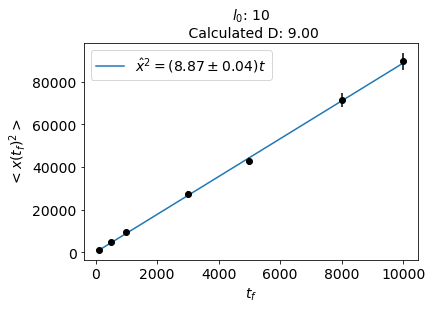

In [19]:
'''
Plot <x(t)^2> of last time step
for various run lengths and fit to
get diffusion constant
'''

calculated_D = (1 - (1/l0)) / (1/l0)
# Fit line
popt, pcov = curve_fit(slope_only, tmaxes, mean_sq_disps, sigma=sq_disps_sems)
print(popt)
print(pcov)

fig, ax = plt.subplots()
ax.errorbar(tmaxes, mean_sq_disps, yerr=sq_disps_sems, fmt='ko')
ax.plot(tmaxes, slope_only(tmaxes, popt[0]), label=r'$\hat{x}^{2}= (8.87 \pm 0.04)t$')
ax.set_xlabel(r'$t_{f}$', fontsize=14)
ax.set_ylabel(r'$<x(t_{f})^{2}>$', fontsize=14)
ax.set_title(r'$l_{0}$: ' + f"{l0}\n Calculated D: {calculated_D:.2f}", fontsize=14)
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

In [ ]:
'''
PLot histogram of (bacteria) run lengths
'''

run_lengths = get_bacteria_run_lens(runs)
mean_run_length = run_lengths.mean()
run_length_sem = run_lengths.std() / np.sqrt(n_runs)

fig, ax = plt.subplots()
ax.hist(run_lengths)
ax.set_title(f"Mean run length: {mean_run_length:.2f}" + r'$\pm$' + f"{run_length_sem:.2f}")
ax.set_xlabel('n')
plt.show()


In [ ]:
'''
Diffusion with gradient
'''

n_runs = 1000
runs = chemotax(apply_grad=True, n_runs=n_runs)

In [ ]:
'''
Plot last timestep historgram - Diffusion with gradient
'''

# Calculate stats
mean_disp = runs[:,-1].mean()
mean_sq_disp = np.square(runs[:,-1]).mean()
disp_sem = runs[:,-1].std() / np.sqrt(n_runs)
print(f"<x(T)> = {mean_disp:.1f}, <x(T)^2> = {mean_sq_disp:.1f}")

# Plot histogram
fig, ax = plt.subplots()
ax.hist(runs[:,-1])
ax.set_title(f"Diffusion w/ gradient \n<x(T)> = {mean_disp:.2f} pm {disp_sem:.2f}")
ax.set_xlabel('x(T) (T = final timestep)')
plt.show()

In [ ]:
'''
Simple diffusion on finite domain (Schnitzer)
'''

n_runs = 1000
runs = chemotax(finite_domain=True, n_runs=n_runs, xmax=50)

In [ ]:
'''
Plot last timestep histograms - simple diffusion on finite domain (Schnitzer)
'''

# Calculate stats
mean_disp = runs[:,-1].mean()
mean_sq_disp = np.square(runs[:,-1]).mean()
disp_sem = runs[:,-1].std() / np.sqrt(n_runs)
print(f"<x(T)> = {mean_disp:.1f}, <x(T)^2> = {mean_sq_disp:.1f}")

# Plot histogram
fig, ax = plt.subplots()
ax.hist(runs[:,-1])
ax.set_title(f"Simple diffusion on finite domain \n<x(T)> = {mean_disp:.2f} pm {disp_sem:.2f}")
ax.set_xlabel('x(T) (T = final timestep)')
plt.show()

In [ ]:
'''
Diffusion with gradient on finite domain (Schnitzer)
'''

n_runs = 1000
runs = chemotax(apply_grad=True, finite_domain=True, n_runs=n_runs, xmax=1000)

In [ ]:
'''
Plot last timestep histograms - diffusion with gradient on finite domain (Schnitzer)
'''

# Calculate stats
mean_disp = runs[:,-1].mean()
mean_sq_disp = np.square(runs[:,-1]).mean()
disp_sem = runs[:,-1].std() / np.sqrt(n_runs)
print(f"<x(T)> = {mean_disp:.1f}, <x(T)^2> = {mean_sq_disp:.1f}")

# Plot histogram
fig, ax = plt.subplots()
ax.hist(runs[:,-1])
ax.set_title(f"Diffusion w/ gradient on finite domain \n<x(T)> = {mean_disp:.2f} pm {disp_sem:.2f}")
ax.set_xlabel('x(T) (T = final timestep)')
plt.show()

# Average position curves

In [ ]:
'''
Average velocity and chemotactic coefficient
'''


In [ ]:
'''
Simple diffusion
'''

n_runs = 10000
tmax = 1000
runs = chemotax(n_runs=n_runs, tmax=tmax)

In [ ]:
'''
Average position over time
'''

# Calculate average position
mean_run = runs.mean(axis=0)
run_sem = runs.std(axis=0) / np.sqrt(n_runs)
run_sem_ds = np.zeros_like(run_sem)

# Downsample for plot
ds = 50
run_sem_ds[::ds] = run_sem[::ds]

# Plot
fig, ax = plt.subplots()
ax.errorbar(np.arange(tmax), mean_run, yerr=run_sem_ds)

# Fit line
popt, _ = curve_fit(lobf, np.arange(tmax), mean_run)
print(popt)
ax.plot(lobf(np.arange(tmax), *popt))

# Label plot
ax.set_title(f"Best fit slope = {popt[0]:.2f}")
ax.set_xlabel('t')
ax.set_ylabel('<x(t)>')
plt.show()


In [3]:
'''
Diffusion w/ gradient
'''

seeds = [1234, 9876, 1212, 1218, 1031, 1225, 1130, 1994]
for seed in seeds:
    print(seed)
    tmax = 40000
    n_runs = 1250
    xmax = None
    x_init = 0
    apply_grad = True
    finite_domain = False
    runs = chemotax(n_runs=n_runs, tmax=tmax, apply_grad=apply_grad, finite_domain=finite_domain, x_init=x_init, seed=seed)

    data_dir = '/home/stef/MarkoRotation/data/'
    fn = f"chemotax_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_10_seed_{seed}_shift_9_gain_0.01.csv"
    np.savetxt(data_dir + fn, runs, delimiter=',')

1234
9876
1212
1218
1031
1225
1130
1994


In [ ]:
'''
Save data
'''

data_dir = '/home/stef/MarkoRotation/data/'
fn = f"chemotax_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_10_seed_{seed}_shift_9_gain_0.01.csv"
np.savetxt(data_dir + fn, runs, delimiter=',')

In [31]:
'''
No boundary average position - fit curve
'''

# Load stats of data
xmax = None
tstart = 4000 # Start fitting polynomial
tmax = 40000
finite_domain = False
apply_grad = True
x_init = 0
data_dir = '/home/stef/MarkoRotation/data/'
fn = f"ave_sem_pos_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_10000_x_init_{x_init}_xmax_{xmax}_l0_10_shift_9_gain_0.01.csv"
ave_sem_pos = np.loadtxt(data_dir + fn, delimiter=',')
errorbars = np.zeros(shape=(tmax,))
ds = 50 # Downsample for plot
errorbars[::ds] = ave_sem_pos[1,::ds]
errorbars[10] = ave_sem_pos[1,10]

# Fit polynomial to post ballistic
# def poly(x, a, n):
#     return a * (x**n)
# res_pow = linregress(np.log(np.arange(tstart, tmax)), np.log(ave_sem_pos[0,tstart:]))
# a, n = np.exp(res_pow.intercept), res_pow.slope
# print(f"r^2: {res_pow.rvalue**2:.4f}, n: {n:.2f}, a: {a:.2f}")
# pobf = poly(np.arange(tmax), a, n)

# # Fit crossover function
# def crossover2(x, a, b, alpha, beta):
#     return (a * (x**alpha)) / (1 + (x / b)**beta)

# def crossover3(x, a, b, alpha, beta):
#     return (a * x**alpha) / np.sqrt(1 + (x / b)**(2 * beta))

def crossover(x, a, b):
    return (a * x) / (1 + (x / (b))**0.5)

ave_sem_pos[1,0] = 1e-3 # Avoid problems assoc with 0 sem in first position
popt, pcov = curve_fit(crossover, np.arange(tmax), ave_sem_pos[0,:], bounds=([-1e5, 1e-4], [1e5, 1e5]), sigma=ave_sem_pos[1,:])
print(popt)
print(pcov)
a, b = popt

cobf = crossover(np.arange(tmax), a, b)

[5.02430028e-02 3.70289790e+03]
[[ 2.87884994e-10 -6.03705948e-05]
 [-6.03705948e-05  1.28072161e+01]]


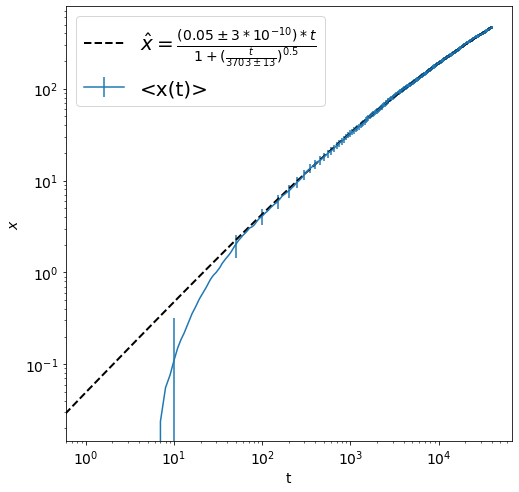

In [46]:

# Plot on log-log
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(np.arange(tmax), ave_sem_pos[0,:], yerr=errorbars, label=r'<x(t)>')
ax.plot(np.arange(tmax), cobf, 'k--', lw=2, label=r'$\hat{x}=\frac{(0.05 \pm 3 * 10^{-10}) * t}{1 + (\frac{t}{3703 \pm 13})^{0.5} }$')
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel(r'$x$', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=20)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

[0.03506556]
[[4.83800922e-09]]


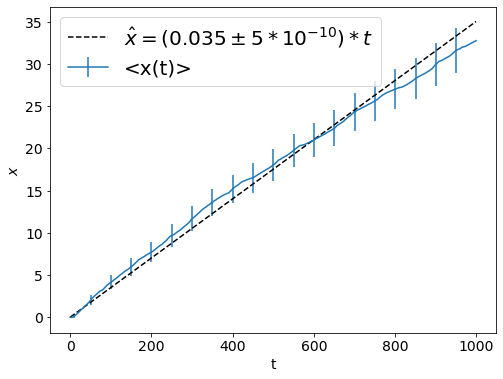

In [48]:
'''
Initial velocity
'''
tstop = 1000
t = np.arange(tstop)
popt, pcov = curve_fit(slope_only, xdata=t, ydata=ave_sem_pos[0, :tstop], sigma=ave_sem_pos[1,:tstop])
print(popt)
print(pcov)
xhat = slope_only(t, popt[0])
fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(t, ave_sem_pos[0,:tstop], yerr=errorbars[:tstop], label=r'<x(t)>')
ax.plot(t, xhat, 'k--', label=r'$\hat{x} = (0.035 \pm 5 * 10^{-10}) * t$')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel(r'$x$', fontsize=14)
ax.legend(fontsize=20)
plt.show()

In [49]:
0.035 * 3703

129.60500000000002

In [ ]:
'''
Average position over time
'''

# Calculate average position
mean_run = runs.mean(axis=0)
run_sem = runs.std(axis=0) / np.sqrt(n_runs)
run_sem_ds = np.zeros_like(run_sem)

# Downsample for plot
ds = 50
run_sem_ds[::ds] = run_sem[::ds]

# Plot
fig, ax = plt.subplots()
ax.errorbar(np.arange(tmax), mean_run, yerr=run_sem_ds)

# Fit line
chemotax_tmax = 1000
# ax.plot(np.arange(chemotax_tmax), mean_run[:chemotax_tmax])
popt, _ = curve_fit(lobf, np.arange(chemotax_tmax), mean_run[:chemotax_tmax])
print(popt)
# ax.plot(lobf(np.arange(chemotax_tmax), *popt))

# Label plot
# ax.set_title(f"Initial slope = {popt[0]:.2f}")
# ax.set_title("Finite domain, " + r'$x_{max}=$' + f"{xmax}\nInital slope = {popt[0]:.2f}")
ax.set_xlabel('t')
ax.set_ylabel('<x(t)>')
plt.show()

In [ ]:
'''
Plot cdf of wall hits
'''

hit_cdf = get_wall_hit_cdf(runs, xmax=xmax)

fig, ax = plt.subplots()
ax.plot(np.arange(tmax), hit_cdf)
ax.set_xlabel('t')
ax.set_ylabel('Fraction collided')
plt.show()

In [ ]:
'''
Chemotactic coefficient at x=0
mean_velocity = chemo_coeff * gradient
'''

mean_velocity = popt[0]
chemo_coeff_zero = mean_velocity / diff_tanh(0)
print(chemo_coeff_zero)

In [ ]:
'''
Chemotactic coefficients at different positions
'''
mean_velocity = 0.03
max_pos = 35
plot_pos = np.arange(-200,200)
chemo_coeffs = mean_velocity / diff_tanh(plot_pos)

fig, ax = plt.subplots()
ax.plot(plot_pos, chemo_coeffs)
ax.set_ylabel(r'$\kappa$')
ax.set_xlabel(r'$<x>$')
ax.set_title('Chemotactic coefficient as a function of position')
plt.show()

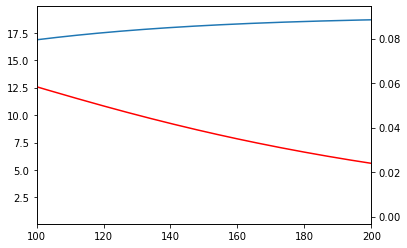

In [5]:
''' 
Visualize gradient function
For reference: Schnitzer varies tumble
probability from 0.3 to 0.03 over 100
positions, so a linear gradient with slope
0.027
'''
l0=10
x = np.arange(-500, 500)
gradient = l0 + 9 * np.tanh(0.01 * x)
fig, ax = plt.subplots()
ax.plot(x, gradient)
ax2 = ax.twinx()
ax2.plot(x, diff_tanh(x), 'r')
ax.set_xlim(100, 200)
plt.show()

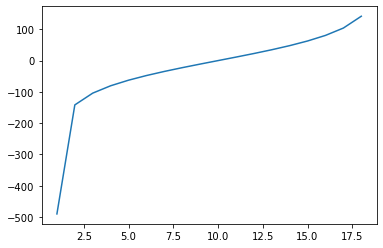

In [70]:
l0 = 10
s = 9
g = 0.01
ep = 1e-3
c = np.arange(l0 - s + ep, l0 + s - ep)

def x2y(x, g=0.01, l0=10, s=9):
    return l0 + s * np.tanh(g * x)

def y2x(y, g=0.01, l0=10, s=9):
    return (np.log(s + y - l0) - np.log(s - y + l0)) / (2 * g)

x = (np.log(s + c - l0) - np.log(s - c + l0)) / (2 * g)

plt.plot(c, x)
plt.show()

In [88]:
x_star = 20
print(x2y(x_star))
print(y2x(x2y(x_star)))

11.776377882024136
20.000000000000007


0.001 200.41880628805808
0.002285714285714286 87.6832277510254
0.0035714285714285718 56.11726576065626
0.004857142857142858 41.26269541224725
0.0061428571428571435 32.62631730270713
0.007428571428571429 26.9794546926232
0.008714285714285716 22.998879410105022
0.01 20.041880628805806


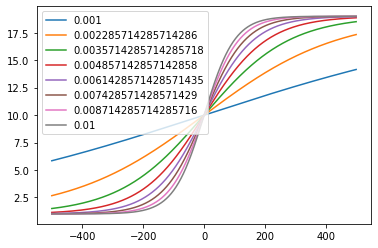

In [93]:
gs = [0.001, 0.005, 0.01, 0.05, 0.1]
gs = np.linspace(0.001, 0.01, num=8)
x = np.arange(-500, 500)
c_star = 11.78
for g in gs:
    x_star = y2x(c_star, g=g)
    print(g, x_star)
    c = x2y(x, g=g)
    plt.plot(x, c, label=g)

plt.legend()
plt.show()

# Characteristic return time as fcn of boundary position

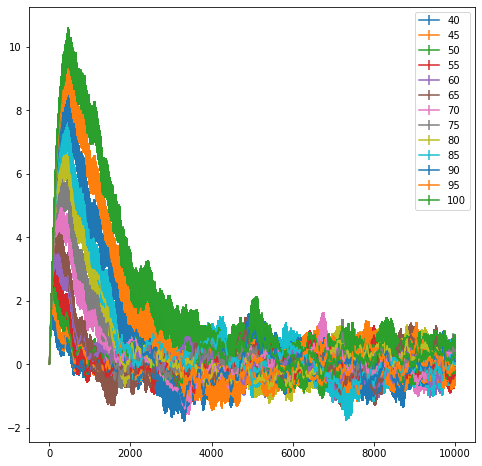

In [3]:
'''
Shape of return curve
'''

# Mean data from loop

xmaxes = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
n_runs = 10000
tmax = 10000
finite_domain = True
apply_grad = True
x_init = 0
data_dir = '/home/stef/MarkoRotation/data/'
ep = 1e-1

run_stats = []
fig, ax = plt.subplots(figsize=(8,8))
for i, xmax in enumerate(xmaxes):
    fn = f"ave_sem_pos_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_10_shift_9_gain_0.01.csv"
    pos_ave_sem = np.loadtxt(data_dir + fn, delimiter=',')
    xmax_idx = np.argmax(pos_ave_sem[0,:])
    final_idx = np.where(abs(pos_ave_sem[0,xmax_idx:]) < ep)[0][0]
    run_stats.append(pos_ave_sem[:,xmax_idx:xmax_idx + final_idx])
    ax.errorbar(np.arange(tmax), pos_ave_sem[0,:], pos_ave_sem[1,:], label=xmax)

ax.legend()
plt.show()

In [124]:
final_idx

5491

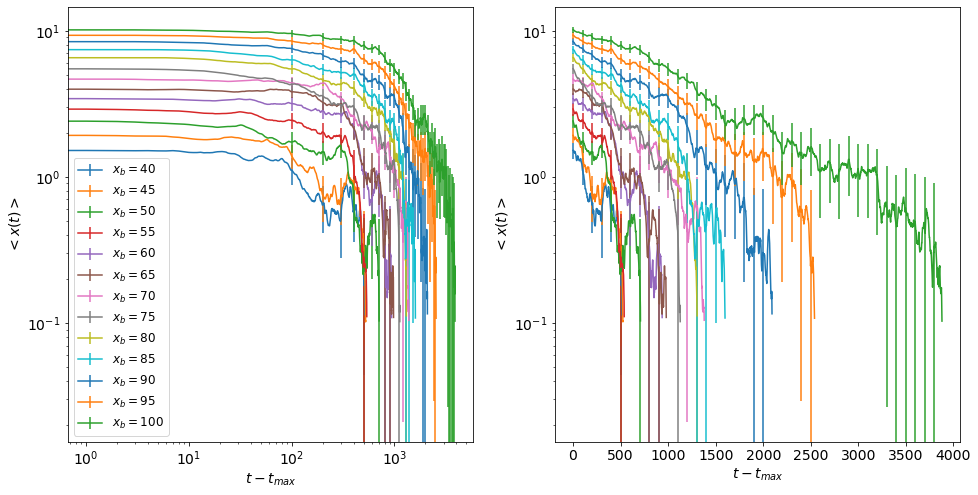

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
t = np.arange(9000)
ds = 100
for i, elt in enumerate(xmaxes):
    t = np.arange(run_stats[i][0].shape[0])
    err = np.zeros(shape=run_stats[i][1].shape)
    err[::ds] = run_stats[i][1][::ds]
    ax[0].errorbar(t, y=run_stats[i][0], yerr=err, label=r'$x_{b}=$' + f"{elt}")
    ax[1].errorbar(t, y=run_stats[i][0], yerr=err)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[0].set_xlabel(r'$t - t_{max}$', fontsize=14)
ax[0].set_ylabel(r'$<x(t)>$', fontsize=14)
ax[1].set_xlabel(r'$t - t_{max}$', fontsize=14)
ax[1].set_ylabel(r'$<x(t)>$', fontsize=14)
ax[0].legend(fontsize=12)
plt.show()

In [100]:
'''
Load characteristic times for reflective boundary chemotax
'''

xmaxes = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
n_pts = len(xmaxes)
beta = 'e'
n_runs = 10000
tmax = 10000
finite_domain = True
apply_grad = True
x_init = 0
data_dir = '/home/stef/MarkoRotation/data/'
tc_fn = f"ave_sem_tc_beta_{beta}_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_10000_x_init_{x_init}_l0_10_shift_9_gain_0.01.csv"

tc_mean_sem = np.loadtxt(data_dir + tc_fn, delimiter=',')
xmaxes, characteristic_times, tc_sem = tc_mean_sem[6:,0], tc_mean_sem[6:,1], tc_mean_sem[6:,2]

[[ 0.02088889 -0.08679061]
 [-0.08679061  0.36248544]]
n: 2.34, a: 0.027, stderr: 0.36


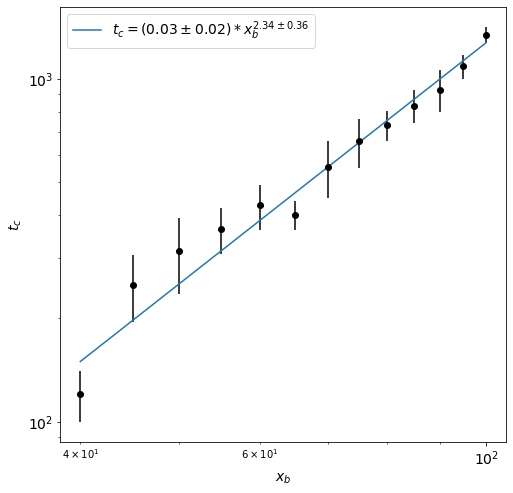

In [110]:

# Power law

popt, pcov = curve_fit(lobf, np.log(xmaxes), np.log(characteristic_times), sigma=np.log(tc_sem))
a, n = np.exp(popt[1]), popt[0]
print(pcov)
print(f"n: {n:.2f}, a: {a:.3f}, stderr: {pcov[1,1]:.2f}")

def poly(x, a, n):
    return a * (x**n)

pobf = poly(xmaxes, a, n)

# Plot characteristic time vs xmax
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(xmaxes, characteristic_times, yerr=tc_sem, fmt='ko')
ax.plot(xmaxes, pobf, label=r'$t_{c} = (0.03 \pm 0.02) * x_{b}^{2.34 \pm 0.36}$')
ax.set_xlabel(r'$x_{b}$', fontsize=14)
ax.set_ylabel(r'$t_{c}$', fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

'$some$'

In [104]:
'''
Load max poses for reflective boundary chemotax
'''

xmaxes = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
n_pts = len(xmaxes)
n_runs = 10000
tmax = 10000
finite_domain = True
apply_grad = True
x_init = 0
data_dir = '/home/stef/MarkoRotation/data/'
mp_fn = f"max_pos_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_10000_x_init_{x_init}_l0_10_shift_9_gain_0.01.csv"

mp_mean_sem = np.loadtxt(data_dir + mp_fn, delimiter=',')
xmaxes, mps, mp_sem = mp_mean_sem[6:,0], mp_mean_sem[6:,1], mp_mean_sem[6:,2]

[[ 0.00060694 -0.00263016]
 [-0.00263016  0.01143677]]
n: 2.02, a: 0.001, stderr: 0.01


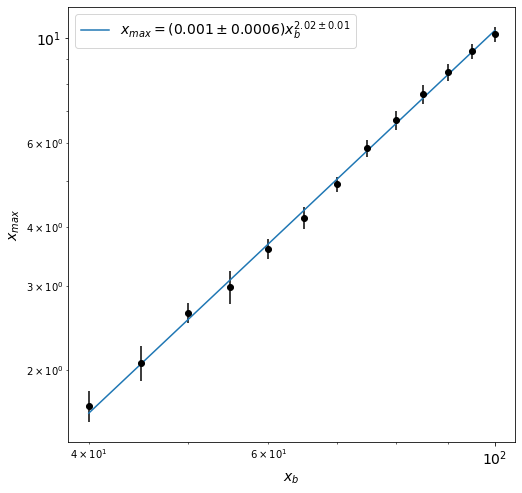

In [108]:

# Power law

popt, pcov = curve_fit(lobf, np.log(xmaxes), np.log(mps), sigma=np.log(mp_sem))
a, n = np.exp(popt[1]), popt[0]
print(pcov)
print(f"n: {n:.2f}, a: {a:.3f}, stderr: {pcov[1,1]:.2f}")

def poly(x, a, n):
    return a * (x**n)

pobf = poly(xmaxes, a, n)

# Plot characteristic time vs xmax
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(xmaxes, mps, yerr=mp_sem, fmt='ko')
ax.plot(xmaxes, pobf, label=r'$x_{max} = (0.001 \pm 0.0006 ) x_{b}^{2.02 \pm 0.01}$')
ax.set_xlabel(r'$x_{b}$', fontsize=14)
ax.set_ylabel(r'$x_{max}$', fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

In [94]:
# max pos ~ x bound w/ ibis 410 error bars

n_runs = 10000
tmax = 10000
finite_domain = True
apply_grad = True
x_init = 0
seed = 9876
grp_size = 2500
n_grps = int(n_runs / grp_size)
data_dir = '/home/stef/MarkoRotation/data/'
xmaxes = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

data_dict = {}    
for xb in xmaxes:    
    fn = f"grouped_mean_sem_pos_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xb}_l0_10_shift_9_gain_0.01.csv"
    data = np.loadtxt(data_dir + fn, delimiter=',')
    data_dict[xb] = data

xbs = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
xbs = np.array(xbs)
group_max_poses = []
for xb in xbs:
    this_group_max_pos = []
    for i in range(n_grps):
        this_group_max_pos.append(np.max(data_dict[xb][i * 2, :]))

    group_max_poses.append(this_group_max_pos)

group_max_poses = np.array(group_max_poses)

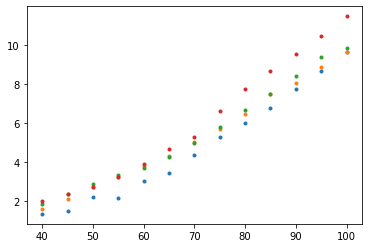

In [95]:
plt.plot(xbs, group_max_poses, '.')
plt.show()

In [96]:
coefs, exps = [], []
for j in range(group_max_poses.shape[1]):
    popt, pcov = curve_fit(lobf, np.log(xbs), np.log(group_max_poses[:,j]))
    a, n = np.exp(popt[1]), popt[0]
    coefs.append(a)
    exps.append(n)
    print(a, n)

coefs, exps = np.array(coefs), np.array(exps)
a = coefs.mean()
n = exps.mean()
n_sem = exps.std() / np.sqrt(n_grps)
print(a, n)
print(type(n))
print(n_sem)

0.000284758177186216 2.265658176979348
0.001272861646621213 1.9473761364271527
0.00195881188642546 1.8536594919192177
0.001053535028150799 2.0196153122627245
0.0011424916845959219 2.0215772793971105
<class 'numpy.float64'>
0.07635506157465344


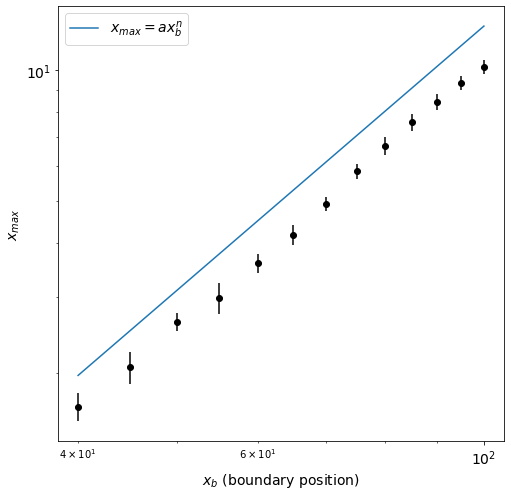

In [97]:
def poly(x, a, n):
    return a * (x**n)
pobf = poly(xbs, a, n)
mean_pos = group_max_poses.mean(axis=1)
sem_pos = group_max_poses.std(axis=1) / np.sqrt(n_grps)

# Plot characteristic time vs xmax
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(xbs, mean_pos, yerr=sem_pos, fmt='ko')
ax.plot(xbs, pobf, label=r'$x_{max} = ax_{b}^{n}$')
ax.set_xlabel(r'$x_{b}$ (boundary position)', fontsize=14)
ax.set_ylabel(r'$x_{max}$', fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

## Characteristic return time w/ boundary beyond saturation

In [145]:
'''
Load average position data for beyond saturation boundaries
'''

xmaxes = [150, 160, 170, 180, 190, 200]
n_pts = len(xmaxes)
beta = 'e'
tmax = 20000
finite_domain = True
apply_grad = True
x_init = 0
data_dir = '/home/stef/MarkoRotation/data/'
tc_fn = f"tc_beyond_saturation_beta_{beta}_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_10000_x_init_{x_init}_l0_10_shift_9_gain_0.01.csv"

tc_mean_sem = np.loadtxt(data_dir + tc_fn, delimiter=',')
xmaxes, characteristic_times, tc_sem = tc_mean_sem[:,0], tc_mean_sem[:,1], tc_mean_sem[:,2]

[[ 0.07844328 -0.40410243]
 [-0.40410243  2.08245268]]
n: 3.32, a: 0.0002, stderr: 2.08


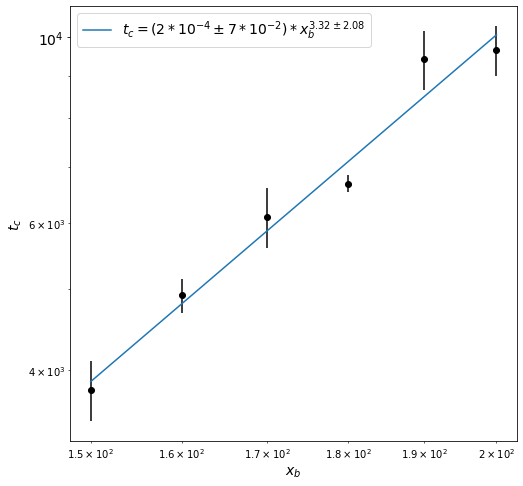

In [151]:
# Power law
popt, pcov = curve_fit(lobf, np.log(xmaxes), np.log(characteristic_times), sigma=np.log(tc_sem))
a, n = np.exp(popt[1]), popt[0]
print(pcov)
print(f"n: {n:.2f}, a: {a:.4f}, stderr: {pcov[1,1]:.2f}")

def poly(x, a, n):
    return a * (x**n)

pobf = poly(xmaxes, a, n)

# Plot characteristic time vs xmax
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(xmaxes, characteristic_times, yerr=tc_sem, fmt='ko')
ax.plot(xmaxes, pobf, label=r'$t_{c} = (2 * 10^{-4} \pm 7 * 10^{-2}) * x_{b}^{3.32 \pm 2.08}$')
ax.set_xlabel(r'$x_{b}$', fontsize=14)
ax.set_ylabel(r'$t_{c}$', fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

In [10]:
res_pow.stderr

0.2812360362265055

# Squishy boundary

In [2]:
'''
Chemotaxis with squishy wall
'''

In [5]:
gs = [0.003, 0.01]
# gs = np.linspace(0.001, 0.01, num=8)
x = np.arange(-500, 500)
c_star = 11.78
for g in gs:
    x_star = conc2pos(c_star, g=g)
    print(g, x_star)

0.003 66.80626876268603
0.01 20.041880628805806


In [10]:
'''
Simulate squishy chemotaxis
'''

tmax = 10000
n_runs = 5000
xmax = 66.86
x_init = 0
apply_grad = True
finite_domain = True
seed = 1234
g = 0.003
runs = chemotax_squish(n_runs=n_runs, tmax=tmax, apply_grad=apply_grad, finite_domain=finite_domain, x_init=x_init, xmax=xmax, gain=g, seed=seed)

In [5]:
'''
Save data
'''

data_dir = '/home/stef/MarkoRotation/data/'
fn = f"chemotax_boundary_squish_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_10_seed_{seed}_shift_9_gain_0.01.csv"
np.savetxt(data_dir + fn, runs, delimiter=',')

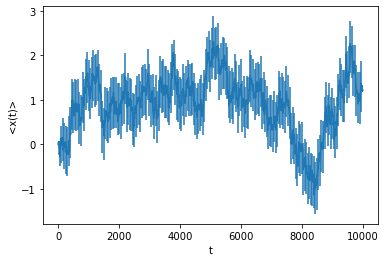

In [11]:
'''
Average position over time
'''

# Calculate average position
mean_run = runs.mean(axis=0)
run_sem = runs.std(axis=0) / np.sqrt(n_runs)
run_sem_ds = np.zeros_like(run_sem)

# Downsample for plot
ds = 50
run_sem_ds[::ds] = run_sem[::ds]

# Plot
fig, ax = plt.subplots()
ax.errorbar(np.arange(tmax), mean_run, yerr=run_sem_ds)
ax.set_xlabel('t')
ax.set_ylabel('<x(t)>')
plt.show()

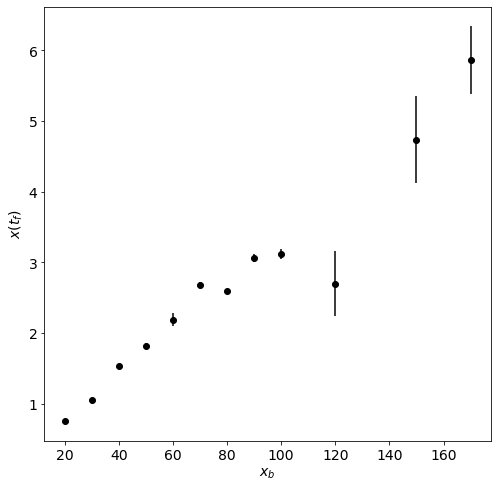

In [52]:
'''
Load squishy boundary data. Plot, 
plot average final position
'''

data_dir = '/home/stef/MarkoRotation/data/'

final_pos = np.loadtxt(data_dir + 'final_position_squishy_boundary.csv', delimiter=',')
xmaxes, final_pos_mean, final_pos_sem = final_pos[:,0], final_pos[:,1], final_pos[:,2]

fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(xmaxes, final_pos_mean, yerr=final_pos_sem, fmt='ko')
ax.set_xlabel(r'$x_{b}$', fontsize=14)
ax.set_ylabel(r'$x(t_{f})$', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

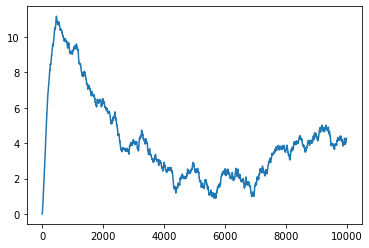

In [4]:
tmax = 10000
n_runs = 5000
xmax = 100
x_init = 0
seed = 1234
apply_grad = True
finite_domain = True
data_dir = '/home/stef/MarkoRotation/data/'
save_fn = f"chemotax_boundary_squish_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_10_seed_{seed}_shift_9_gain_0.01.csv"
this_run = np.loadtxt(data_dir + save_fn, delimiter=',')
ave_run = this_run.mean(axis=0)
plt.plot(ave_run)
plt.show()

# Hump

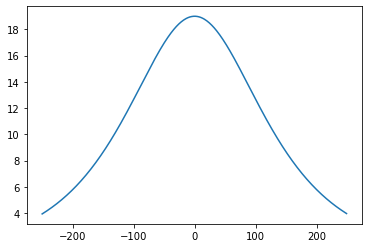

10.054340146192528


In [121]:
'''
Experiments with hyperbolic secant gradient
'''

linf=1
x = np.arange(-250, 250)
gradient = linf + 18 / np.cosh(0.01 * x)
fig, ax = plt.subplots()
ax.plot(x, gradient)
plt.show()
print(linf + 18 / np.cosh(0.01*(-131)))

In [72]:
def chemotax_hump(linf=1, n_runs=10000, tmax=10000, x_init=0, apply_grad=False, seed=1234, shift=18, gain=0.01, finite_domain=False, xmax=250):
    '''
    Simulates chemotaxis with or without gradient on a finite domain
    or on an infinite one.
    '''

    rng = np.random.default_rng(seed)

    # Simulate
    runs = []
    for i in range(n_runs):
        this_run = []
        pos = x_init # Initialize position
        direct = rng.choice([-1, 1]) # 50/50 random init direction
        for t in range(tmax):
            this_run.append(pos) # Append position
            pos += direct # Update position
            
            # Select either static pflip or fcn of position
            if apply_grad:
                l = linf + shift / np.cosh(gain * pos) # Update average run len
                pflip = 1 / l # Flip prob is fcn of position
            else:
                pflip = 1 / 10
            
            # Update direction
            if rng.uniform() < pflip:
                direct *= -1

            # If enforcing finite domain, check if at boundary
            if (finite_domain) & (pos == xmax):
                direct = -1
            elif (finite_domain) & (pos == -xmax):
                direct = 1
        
        runs.append(this_run)
    
    return np.array(runs)

In [122]:
n_runs = 5000
tmax = 10000
apply_grad = True
finite_domain = False
x_init = -131
xmax = None
seed = 1234
runs = chemotax_hump(n_runs=n_runs, tmax=tmax, apply_grad=apply_grad, x_init=x_init)

In [124]:
'''
Save run data
'''
data_dir = '/home/stef/MarkoRotation/data/'
fn = f"chemotax_hump_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_10_seed_{seed}_shift_9_gain_0.01.csv"
np.savetxt(data_dir + fn, runs, delimiter=',')

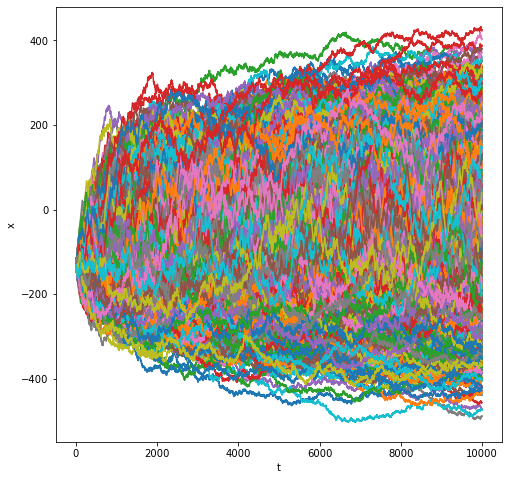

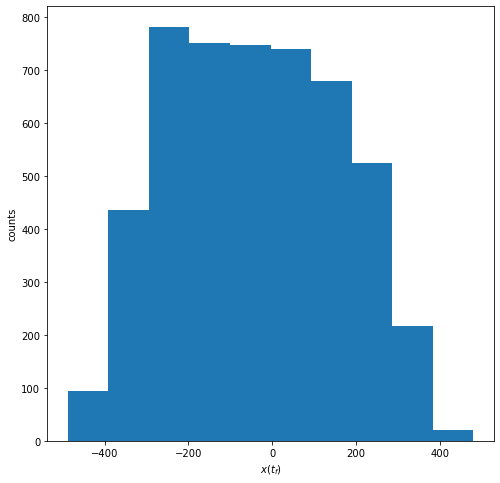

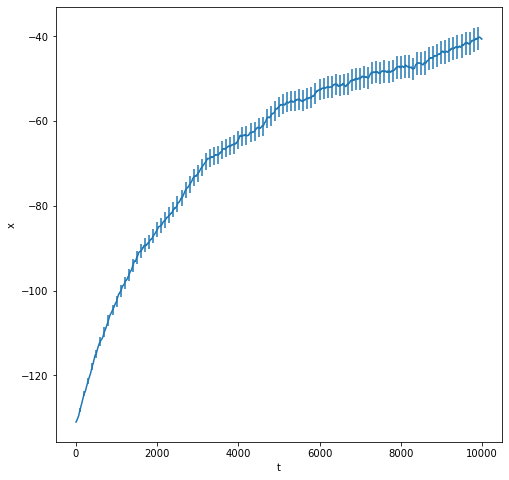

In [123]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(runs[:1000,:].T)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
plt.hist(runs[:,-1])
ax.set_xlabel(r'$x(t_{f})$')
ax.set_ylabel('counts')
plt.show()

ave_pos = runs.mean(axis=0)
sem_pos = runs.std(axis=0) / np.sqrt(n_runs)
sem_plot = np.zeros_like(sem_pos)
ds = 100
sem_plot[::ds] = sem_pos[::ds]
fig, ax = plt.subplots(figsize=(8,8))
plt.errorbar(np.arange(tmax), ave_pos, yerr=sem_plot)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

In [125]:
'''
Load run data
'''
n_runs = 5000
tmax = 10000
apply_grad = True
finite_domain = False
x_init = 0
xmax = None
seed = 1234
data_dir = '/home/stef/MarkoRotation/data/'
fn = f"chemotax_hump_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_10_seed_{seed}_shift_9_gain_0.01.csv"
trials = np.loadtxt(data_dir + fn, delimiter=',')

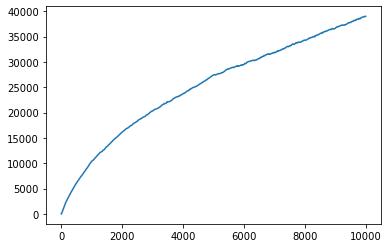

In [128]:
'''
Plot variance of x over t
'''
trange = np.arange(tmax)
var = np.var(trials, axis=0)
std = np.std(trials, axis=0)
plt.plot(trange, var)
plt.show()

# Average velocity, chemotactic coefficient, scaling with l_0

In [5]:
'''
Back of the envelope to get right range for l0s
l0 * gamma << 1
'''

l0 = 10 # Greatest l0 you'll run
shift = 9
g = 1e-2
gamma = g * shift
print(l0 * gamma)
print(gamma)

0.8999999999999999
0.09


0.3333333333333333

In [ ]:
# Load in l0 conditions and get average position v time
l0s = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
n_runs = 10000
tmax = 1000
finite_domain = False
apply_grad = True
x_init = 0
xmax = None
seed = 1234
grp_size = 2500
n_grps = int(n_runs / grp_size)
xstep = 1
tstep = 1
g = 1e-2
gamma = diff_tanh(0, gain=g) * tstep
tstart = 5
tstop = 50 # Fit line from tstart to tstop
data_dir = '/home/stef/MarkoRotation/data/'

ave_sem_pos = []
ave_sem_run_len = []
comp_kappas = []
for l0 in l0s:
    fn = f"chemotax_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_{l0}_seed_{seed}_shift_9_gain_{g}.csv"
    runs = np.loadtxt(data_dir + fn, delimiter=',')
    this_kappas = []
    for i in range(n_grps):
        this_ave_pos = runs[i*grp_size:(i+1)*grp_size].mean(axis=0)
        res = linregress(np.arange(tstart, tstop), this_ave_pos[tstart:tstop])
        print(res.slope)
        this_kappas.append(res.slope / gamma)
        
    this_kappas = np.array(this_kappas)
    comp_kappas.append([this_kappas.mean(), this_kappas.std() / np.sqrt(n_grps)])
    
    # Position
    ave, sem = runs.mean(axis=0), runs.std(axis=0) / np.sqrt(n_runs)
    ave_sem_pos.append([ave, sem])

    # Calculate run lengths (as in bacteria run lengths)
    run_lengths = get_bacteria_run_lens(runs)
    mean_run_length = run_lengths.mean()
    run_length_sem = run_lengths.std() / np.sqrt(n_runs)
    ave_sem_run_len.append([mean_run_length, run_length_sem])

ave_sem_run_len = np.array(ave_sem_run_len)
comp_kappas = np.array(comp_kappas)


In [ ]:
# Plot, plot zoomed around n=0
tstop = 100
for i, l0 in enumerate(l0s):
    fig, ax = plt.subplots(1,2)
    ax[0].errorbar(np.arange(tmax), ave_sem_pos[i][0], yerr=ave_sem_pos[i][1])
    ax[1].plot(np.arange(tmax)[:tstop], ave_sem_pos[i][0][:tstop])
    plt.show()

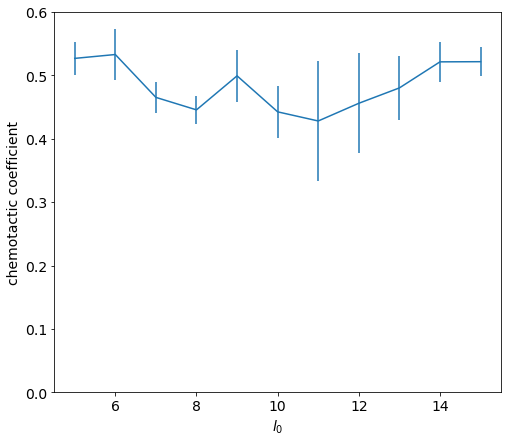

In [31]:
# Calculate chemotactic coefficient from analytical result
calc_kappas = []
for i, l0 in enumerate(l0s):
    calc_kappa = (xstep / tstep) * l0**2
    calc_kappas.append(calc_kappa)

# Plot v(n=0) vs l0 & fit curve
fig, ax = plt.subplots(figsize=(8,7))
ax.errorbar(l0s, comp_kappas[:,0], yerr=comp_kappas[:,1])
ax.set_xlabel(r'$l_{0}$', fontsize=14)
ax.set_ylabel('chemotactic coefficient', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylim(0, 0.6)
plt.show()

4.5161986139824625e-08
2.1105828857799026e-08
5.3777512149603763e-08
3.3062700171338705e-08


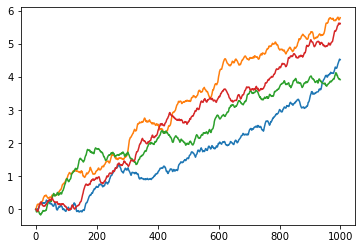

2.4691607895969234e-08
2.3828594920685212e-08
2.7599640459150855e-08
6.384445516900995e-08


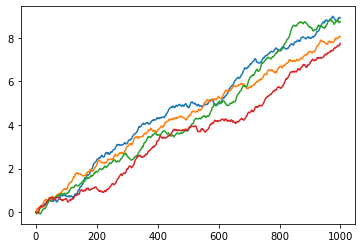

1.2375716893425382e-08
1.1080263170328204e-08
4.805753598507438e-08
1.925869116597532e-08


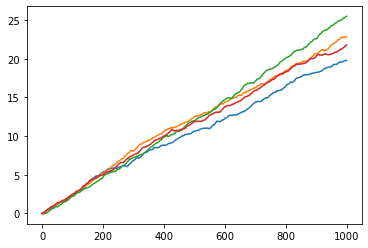

3.493871678519817e-08
1.990572967457353e-08
5.3887615555591435e-08
4.6345397836932324e-08


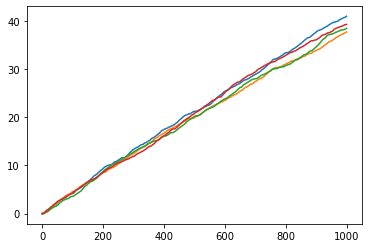

6.655735283079513e-08
3.4096512697064216e-08
1.3940379202082733e-07
4.155483816452102e-08


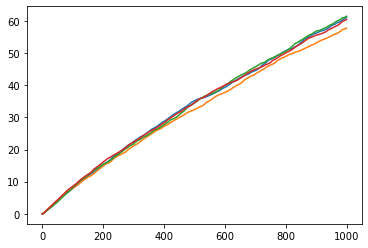

In [28]:
# Load in g conditions and get average position v time
l0 = 5
n_runs = 10000
tmax = 1000
finite_domain = False
apply_grad = True
x_init = 0
xmax = None
seed = 1234
grp_size = 2500
n_grps = int(n_runs / grp_size)
xstep = 1
tstep = 1
gs = [1e-3, 2e-3, 5e-3, 1e-2, 2e-2]
tstart = 0
tstop = 100 # Fit line from tstart to tstop
data_dir = '/home/stef/MarkoRotation/data/'

comp_vels = []
for g in gs:
    fn = f"chemotax_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_{l0}_seed_{seed}_shift_9_gain_{g}.csv"
    runs = np.loadtxt(data_dir + fn, delimiter=',')
    this_kappas = []
    this_vels = []
    for i in range(n_grps):
        this_ave_pos = runs[i*grp_size:(i+1)*grp_size].mean(axis=0)
        plt.plot(this_ave_pos)
        popt, pcov = curve_fit(slope_only, np.arange(tstart, tstop), this_ave_pos[tstart:tstop])
        print(pcov[0][0])
        vel = popt[0]
        # res = linregress(np.arange(tstart, tstop), this_ave_pos[tstart:tstop])
        # print(res.intercept)
        # vel = res.slope
        this_vels.append(vel)
    plt.show()
    this_vels = np.array(this_vels)
    comp_vels.append([this_vels.mean(), this_vels.std() / np.sqrt(n_grps)])

comp_vels = np.array(comp_vels)

0.45918394027234033 8.214994727731459e-05


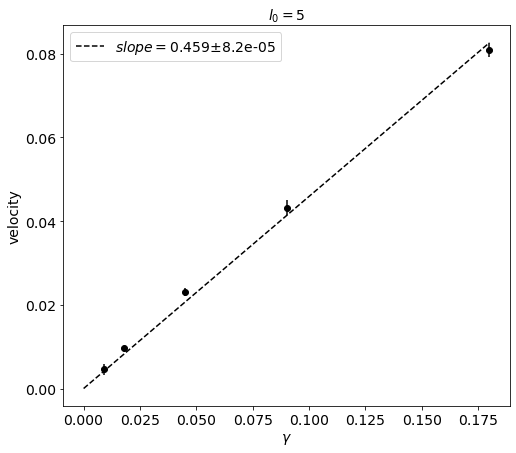

In [29]:
gammas = diff_tanh(0, gain=np.array(gs))
gamma_range = np.linspace(0, gammas.max(), num=25)
popt, pcov = curve_fit(slope_only, gammas, comp_vels[:,0])
lobf = slope_only(gamma_range, popt[0])
print(popt[0], pcov[0][0])

fig, ax = plt.subplots(figsize=(8,7))
ax.errorbar(gammas, comp_vels[:,0], yerr=comp_vels[:,1], fmt='ko')
ax.plot(gamma_range, lobf, 'k--', label=f"$slope={popt[0]:.3f}$" + r'$\pm$' + f"{pcov[0][0]:.1e}")
ax.set_title(r'$l_0=$' + f"{l0}", fontsize=14)
ax.set_xlabel(r'$\gamma$', fontsize=14)
ax.set_ylabel('velocity', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(fontsize=14)
plt.show()

In [53]:
# Calculate chemotactic coeff and error bars using grouping

l0s = [5, 10, 15]
n_runs = 10000
tmax = 1000
finite_domain = False
apply_grad = True
x_init = 0
xmax = None
seed = 1234
grp_size = 2500
n_grps = int(n_runs / grp_size)
xstep = 1
tstep = 1
gs = [1e-3, 2e-3, 5e-3, 1e-2, 2e-2]
gammas = diff_tanh(0, gain=np.array(gs)).reshape(1, len(gs))
tstart = 0
tstop = 50 # Fit line from tstart to tstop
data_dir = '/home/stef/MarkoRotation/data/'

kappas = []
for l0 in l0s:
    vels = []
    for i in range(n_grps):
        this_vels = []
        for g in gs:
            # Load in
            fn = f"chemotax_gradient_{apply_grad}_finite_{finite_domain}_tmax_{tmax}_n_runs_{n_runs}_x_init_{x_init}_xmax_{xmax}_l0_{l0}_seed_{seed}_shift_9_gain_{g}.csv"
            runs = np.loadtxt(data_dir + fn, delimiter=',')

            # Slice ith group
            # Calculate mean pos
            this_ave_pos = runs[i*grp_size:(i+1)*grp_size].mean(axis=0)

            # Calculate ave velocity
            popt, pcov = curve_fit(slope_only, np.arange(tstart, tstop), this_ave_pos[tstart:tstop])
            this_vels.append(popt[0])
            
        vels.append(this_vels)

    vels = np.array(vels)

    # Calculate chemotactic coeff
    this_kappas = vels / gammas
    mean_kappas, sem_kappas = this_kappas.mean(axis=0), this_kappas.std(axis=0) / np.sqrt(n_grps)
    kappas.append([mean_kappas, sem_kappas])

    

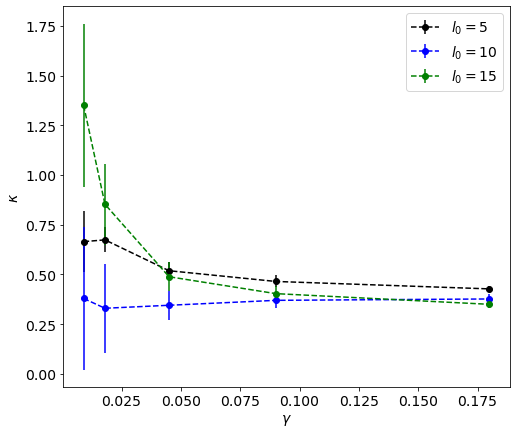

In [55]:

colors = ['k', 'b', 'g']
fig, ax = plt.subplots(figsize=(8,7))
for i, l0 in enumerate(l0s):
    ax.errorbar(gammas.ravel(), kappas[i][0], yerr=kappas[i][1], color=colors[i], fmt='o--', label=r'$l_0=$' + f"{l0}")

ax.set_xlabel(r'$\gamma$', fontsize=14)
ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(fontsize=14)
plt.show()

In [32]:
'''
Diffusion with gradient
'''
l0 = 10
g = 1e-1
shift = 9
finite_domain = False
apply_grad = True
n_runs = int(1e4)
tmax = 100
x_init = 0

runs = chemotax(l0=l0, gain=g, shift=shift, finite_domain=finite_domain, apply_grad=apply_grad, n_runs=n_runs, tmax=tmax, x_init=x_init)

0.23846039525691698
0.21432611330698284
0.21735915678524378
0.24390714097496705


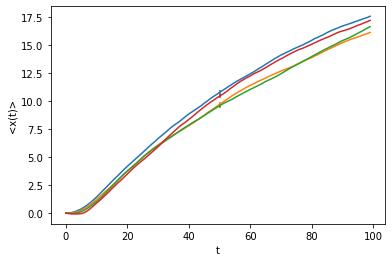

0.253903557312253 0.007144918665636915


In [33]:
'''
Average position over time
'''
grp_size = 2500
tstart = 5
tstop = 50
n_grps = int(n_runs / grp_size)
xstep = 1
tstep = 1
gamma = diff_tanh(0, gain=g) * tstep
tstart = 5
tstop = 50 # Fit line from tstart to tstop
fig, ax = plt.subplots()

this_kappas = []
for i in range(n_grps):


    # Calculate average position
    this_runs = runs[i*grp_size:(i+1)*grp_size]
    this_ave_pos = this_runs.mean(axis=0)
    res = linregress(np.arange(tstart, tstop), this_ave_pos[tstart:tstop])
    print(res.slope)
    this_kappas.append(res.slope / gamma)
    
    mean_run = this_runs.mean(axis=0)

    # Plot
    ax.plot(np.arange(tmax), mean_run)
    ax.set_xlabel('t')
    ax.set_ylabel('<x(t)>')
plt.show()

this_kappas = np.array(this_kappas)
kappa_mean, kappa_sem = this_kappas.mean(), this_kappas.std() / np.sqrt(n_grps)
print(kappa_mean, kappa_sem)